In [12]:
from Bio import SeqIO
import pandas as pd
from pathlib import Path

In [13]:
df = pd.read_csv("../data/dms_signal/combined.tsv", sep="\t")
df["chr"].unique()

array(['chrI', 'chrII', 'chrIII', 'chrIV', 'chrIX', 'chrMito', 'chrV',
       'chrVI', 'chrVII', 'chrVIII', 'chrX', 'chrXI', 'chrXII', 'chrXIII',
       'chrXIV', 'chrXV', 'chrXVI'], dtype=object)

In [14]:
GENE_NAME = "ASH1"
CHR = "chrXI"
TRANSCRIPT_ID = "NM_001179751.1"
TRANSCRIPT_START = 94499
THRESHOLD = 0.2

In [15]:
# GENE_NAME = "HAC1"
# CHR = "chrVI"
# TRANSCRIPT_ID = "NM_001179935.1"
# TRANSCRIPT_START = 75179
# THRESHOLD = 0.2

In [16]:
sel_chr = df[df["chr"] == CHR]
sel_chr

,chr,pos,signal
1323923,chrXI,3079,1.0
1323924,chrXI,3250,1.0
1323925,chrXI,3267,1.0
1323926,chrXI,3269,1.0
1323927,chrXI,3278,1.0
...,...,...,...
1464550,chrXI,664843,1.0
1464551,chrXI,664845,1.0
1464552,chrXI,664849,1.0
1464553,chrXI,664912,1.0


In [17]:
transcripts = SeqIO.parse("../data/R64/rna.fna", "fasta")
for rec in transcripts:
    if rec.id == TRANSCRIPT_ID:
        Path(f"../output/{GENE_NAME}").mkdir(parents=True, exist_ok=True)
        with open(f"../output/{GENE_NAME}/seq.fasta", "w") as f:
            f.write(f">{rec.id}\n{rec.seq}\n")
        break

In [18]:
sel_chr.loc[:, "pos"] = sel_chr["pos"] - TRANSCRIPT_START
sel_chr = sel_chr[sel_chr["pos"] >= 0]
sel_chr

,chr,pos,signal
1340742,chrXI,2,1.0
1340743,chrXI,4,2.0
1340744,chrXI,18,1.0
1340745,chrXI,22,2.0
1340746,chrXI,23,2.0
...,...,...,...
1464550,chrXI,570344,1.0
1464551,chrXI,570346,1.0
1464552,chrXI,570350,1.0
1464553,chrXI,570413,1.0


In [19]:
transcript_signals = []
for idx, nt in enumerate(rec.seq):
    if idx in sel_chr["pos"].values and nt in "AT":
        transcript_signals.append([nt, sel_chr[sel_chr["pos"] == idx]["signal"].values[0]])
    else:
        transcript_signals.append([nt, 0])

In [20]:
transcript_signals = pd.DataFrame(transcript_signals, columns=["nt", "signal"])
transcript_signals["signal"] = transcript_signals["signal"] / transcript_signals["signal"].max()
transcript_signals

,nt,signal
0,A,0.0000
1,T,0.0000
2,G,0.0000
3,T,0.0000
4,C,0.0000
...,...,...
1762,A,0.0625
1763,T,0.0000
1764,T,0.0000
1765,G,0.0000


<Axes: >

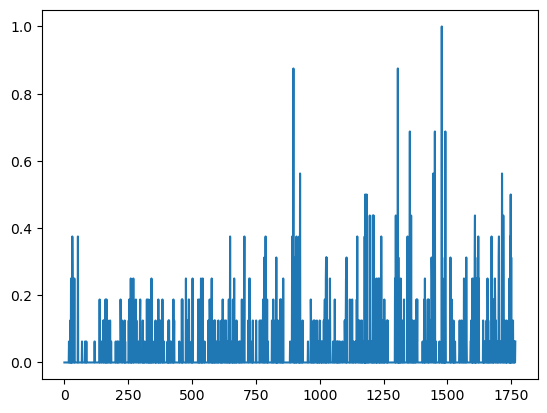

In [21]:
transcript_signals["signal"].plot()

In [22]:
constraints = [
    "x" if transcript_signals["signal"].iloc[i] > THRESHOLD
    else "." for i in range(len(transcript_signals))
]
with open(f"../output/{GENE_NAME}/constrained.fasta", "w") as f:
    f.write(f">{rec.id}\n{rec.seq}\n{''.join(constraints)}\n")